In [1]:
import json
import random
from collections import namedtuple

import pandas as pd
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

In [26]:
data = pd.read_json("/home/tatiana/MADE_Ubuntu/MADE_2/RecSys/sticky_artists_log/data.json", lines=True)
                    #/home/tatiana/MADE_Ubuntu/MADE_2/RecSys/data/tracks_with_recs.json", lines=True)
data["rnd"] = np.random.random(len(data))

data.head(20)

,message,timestamp,user,track,time,latency,recommendation,experiments,rnd
0,next,2023-04-04 22:22:08.550,1060,23734,1.00,0.002296,49629.0,{'Sticky_Artist': 'C'},0.497622
1,next,2023-04-04 22:22:08.557,1060,49629,0.00,0.000401,14991.0,{'Sticky_Artist': 'C'},0.157183
2,next,2023-04-04 22:22:08.575,1060,23734,1.00,0.000458,30255.0,{'Sticky_Artist': 'C'},0.053501
3,next,2023-04-04 22:22:08.576,1060,14991,0.29,0.000351,48802.0,{'Sticky_Artist': 'C'},0.192696
4,next,2023-04-04 22:22:08.579,1060,23734,1.00,0.000288,698.0,{'Sticky_Artist': 'C'},0.692281
5,next,2023-04-04 22:22:08.583,1060,48802,0.00,0.000311,38739.0,{'Sticky_Artist': 'C'},0.085451
6,next,2023-04-04 22:22:08.587,1060,30255,0.93,0.000324,21026.0,{'Sticky_Artist': 'C'},0.077512
7,next,2023-04-04 22:22:08.593,1060,698,0.00,0.000379,8744.0,{'Sticky_Artist': 'C'},0.384204
8,next,2023-04-04 22:22:08.597,1060,38739,0.01,0.000503,33890.0,{'Sticky_Artist': 'C'},0.250599
9,next,2023-04-04 22:22:08.601,1060,21026,0.00,0.001944,36622.0,{'Sticky_Artist': 'C'},0.904227


In [25]:
data

,message,timestamp,user,track,time,latency,recommendation,experiments,rnd
0,next,2023-04-05 22:37:09.758,6643,32502,1.00,0.000516,17324.0,{'TOP_POP': 'C'},0.829386
1,next,2023-04-05 22:37:09.768,6643,17324,0.00,0.000399,1857.0,{'TOP_POP': 'C'},0.839608
2,next,2023-04-05 22:37:09.769,6643,32502,1.00,0.000321,25834.0,{'TOP_POP': 'C'},0.211134
3,next,2023-04-05 22:37:09.774,6643,1857,0.09,0.000383,22421.0,{'TOP_POP': 'C'},0.917164
4,next,2023-04-05 22:37:09.776,6643,25834,0.00,0.000276,34029.0,{'TOP_POP': 'C'},0.702778
...,...,...,...,...,...,...,...,...,...
59742,next,2023-04-06 19:56:38.461,7211,4186,0.00,0.000176,2254.0,{'TOP_POP': 'T1'},0.245579
59743,next,2023-04-06 19:56:38.465,7211,2254,0.00,0.000149,7585.0,{'TOP_POP': 'T1'},0.220071
59744,next,2023-04-06 19:56:38.470,7211,7585,0.00,0.000160,7585.0,{'TOP_POP': 'T1'},0.171672
59745,next,2023-04-06 19:56:38.474,7211,7585,0.00,0.000153,246.0,{'TOP_POP': 'T1'},0.042276


## Compute track popularity

In [9]:
track_popularity = (
    data[data["rnd"] > 0.5]
    .groupby("track")["time"]
    .sum()
    .to_frame()
    .sort_values("time", ascending=False)
    .reset_index()
)

track_popularity.head()

,track,time
0,4186,10.00
1,171,9.06
2,140,8.76
3,176,8.41
4,14375,8.24


In [10]:
len(track_popularity)

12872

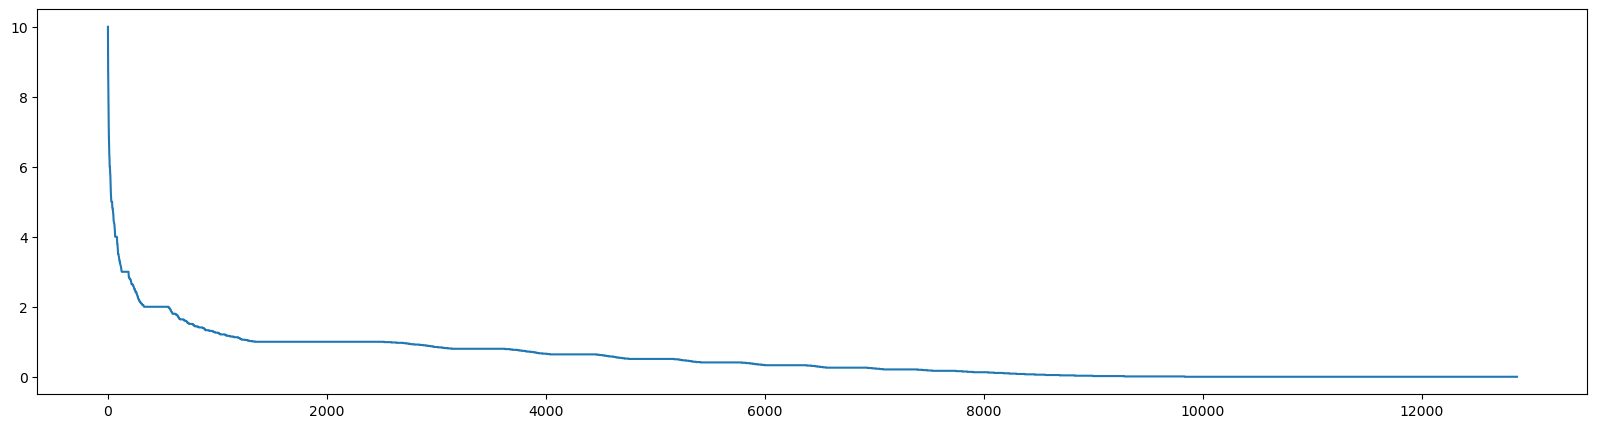

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(track_popularity.index.values, track_popularity["time"].values)

# ax.set_xscale("log")
# ax.set_yscale("log")

pass

## Compute offline metrics

In [17]:
# recommendations - список рекомендованных track id от лучшего к худшему
# track           - id трека, который выбрал пользователь
# k               - k в precision@K


def precision_at(recommendations, track, k):
    return 1.0 / k * int(track in recommendations[:k])


    
def shuffled_precision_at(recommendations, track, k):
    shuffled = list(recommendations)
    random.shuffle(shuffled)
    return precision_at(shuffled, track, k)

In [18]:
tracks = track_popularity["track"].tolist()

t_p_10 = lambda track: precision_at(tracks, track, 10)
st_10_p_10 = lambda track: shuffled_precision_at(tracks[:10], track, 10)
st_100_p_10 = lambda track: shuffled_precision_at(tracks[:100], track, 10)
st_1000_p_10 = lambda track: shuffled_precision_at(tracks[:1000], track, 10)


metrics = data[(data["rnd"] <= 0.5) & (data["time"] >= 0.75)].copy()

metrics["top10_PrecAt10"] = metrics["track"].map(t_p_10)
metrics["shuffledTop10_PrecAt10"] = metrics["track"].map(st_10_p_10)
metrics["shuffledTop100_PrecAt10"] = metrics["track"].map(st_100_p_10)
metrics["shuffledTop1000_PrecAt10"] = metrics["track"].map(st_1000_p_10)

metrics[["top10_PrecAt10", "shuffledTop10_PrecAt10", "shuffledTop100_PrecAt10", "shuffledTop1000_PrecAt10"]].describe()

,top10_PrecAt10,shuffledTop10_PrecAt10,shuffledTop100_PrecAt10,shuffledTop1000_PrecAt10
count,4179.000000,4179.000000,4179.000000,4179.000000
mean,0.000885,0.000885,0.000550,0.000215
std,0.009369,0.009369,0.007399,0.004636
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,0.100000,0.100000,0.100000,0.100000


In [19]:
def mrr(recommendations, track):
    return 1.0 / (1 + recommendations.index(track)) if track in recommendations else 0.0

    
def shuffled_mrr(recommendations, track):
    shuffled = list(recommendations)
    random.shuffle(shuffled)
    return mrr(shuffled, track)

In [20]:
tracks = track_popularity["track"].tolist()

t_mrr = lambda track: mrr(tracks, track)
st_10_mrr = lambda track: shuffled_mrr(tracks[:10], track)
st_100_mrr = lambda track: shuffled_mrr(tracks[:100], track)
st_1000_mrr = lambda track: shuffled_mrr(tracks[:1000], track)

metrics = data[(data["rnd"] <= 0.5) & (data["time"] >= 0.75)].copy()

metrics["top10_mrr"] = metrics["track"].map(t_mrr)
metrics["shuffledTop10_mrr"] = metrics["track"].map(st_10_mrr)
metrics["shuffledTop100_mrr"] = metrics["track"].map(st_100_mrr)
metrics["shuffledTop1000_mrr"] = metrics["track"].map(st_1000_mrr)

metrics[["top10_mrr", "shuffledTop10_mrr", "shuffledTop100_mrr", "shuffledTop1000_mrr"]].describe()

,top10_mrr,shuffledTop10_mrr,shuffledTop100_mrr,shuffledTop1000_mrr
count,4179.000000,4179.000000,4179.000000,4179.000000
mean,0.004210,0.002677,0.002180,0.001711
std,0.031053,0.037912,0.017144,0.027443
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000104,0.000000,0.000000,0.000000
75%,0.000593,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.500000,1.000000


## Export data for prod

In [21]:
with open("/Users/n.anokhin/Desktop/top_tracks.json", "w") as top_tracks_file:
    json.dump(track_popularity["track"].tolist(), top_tracks_file)